In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Fases:

- Carga Dataset
- Inspección
- Nulos
- Outliers

### CARGA DATASET Y VISUALIZACIÓN

In [3]:
df_raw = pd.read_parquet("../data/raw/reservas_hoteles.parquet", engine = 'auto')
df_raw

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
0,5256cc90-139b-43d2-8ec5-412495d751cf,346f2a77-33f4-4b2d-82f3-e8501e21b28d,Feliciana,Cantón,feliciana.cantón@example.com,True,,2025-03-01,2025-03-02,113,NaN,,NaN,
1,84fd6209-bd8d-4a92-bfe6-c68ee2c49271,346f2a77-33f4-4b2d-82f3-e8501e21b28d,Leonardo,Hierro,leonardo.hierro@example.com,True,,2025-03-01,2025-03-02,194,NaN,,NaN,
2,40c4cb55-d1f5-407b-832f-4756b8ff77b4,6ec4d7d2-e382-47cc-94f6-c647577d4035,Maite,Calatayud,maite.calatayud@example.com,False,2025-02-09,2025-03-01,2025-03-02,14,119.96,Hotel Monte Verde,1.0,Madrid
3,f2ce8df5-7844-43e1-8c0f-97ce7a208f21,aed17fe8-eb18-4f69-bf08-df1afdc339c3,Tecla,Bonet,tecla.bonet@example.com,False,2025-02-08,2025-03-01,2025-03-02,38,211.53,Hotel Brisas del Mar,5.0,Madrid
4,57d4515a-447d-4067-afcb-9bdcf4e4e915,710a2fbb-264f-426a-aa66-f8fffd146a2d,Amílcar,Andrés,amílcar.andrés@example.com,False,2025-02-02,2025-03-01,2025-03-02,35,378.37,Hotel Camino del Sol,1.0,Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15093,49c9a352-a260-46fb-9edc-a2c2d05fdfb9,cc50c0c1-a589-44b7-8a41-2c731d033f89,Victoriano,Miralles,victoriano.miralles@example.com,False,2025-02-02,2025-03-01,2025-03-02,36,367.65,Hotel Las Estrellas,3.0,Madrid
15094,f07370e3-feeb-4893-a9ff-4ec4fb518a55,2bf0215f-7f7b-4cfb-9a37-d2022c492410,Anacleto,Toledo,anacleto.toledo@example.com,False,2025-02-07,2025-03-01,2025-03-02,38,144.35,Gran Hotel Madrid,4.0,Madrid
15095,1d4b9293-1733-45ce-8a8e-79d3ac4694eb,4ba34638-c43e-455f-886d-b3e3dd223a07,Máxima,Mayoral,máxima.mayoral@example.com,False,2025-02-08,2025-03-01,2025-03-02,29,463.32,Hotel Jardines del Rey,2.0,Madrid
15096,d6823ca7-e236-48b1-bf68-6b88d9b6534a,a017cb9c-160b-4b90-b4a9-4bdb2dce546a,Rafa,Alcaraz,rafa.alcaraz@example.com,False,2025-02-10,2025-03-01,2025-03-02,15,247.63,Hotel Palacio Imperial,1.0,Madrid


### Generamos una copia para trabajar sobre ella y mantrener intacto el archivo original

In [4]:
df = df_raw.copy()

In [5]:
df.shape

(15098, 14)

### Comprobamos duplicados exactos

In [6]:
df.duplicated().sum()

np.int64(98)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_reserva       15000 non-null  object 
 1   id_cliente       15000 non-null  object 
 2   nombre           15000 non-null  object 
 3   apellido         15000 non-null  object 
 4   mail             15000 non-null  object 
 5   competencia      15000 non-null  bool   
 6   fecha_reserva    15000 non-null  object 
 7   inicio_estancia  14925 non-null  object 
 8   final_estancia   14925 non-null  object 
 9   id_hotel         15000 non-null  int64  
 10  precio_noche     9776 non-null   float64
 11  nombre_hotel     15000 non-null  object 
 12  estrellas        9828 non-null   float64
 13  ciudad           15000 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(10)
memory usage: 1.6+ MB


### Asignamos tipo de dato correctos a las columnas de fecha

In [9]:
def convertir_columnas_datetime(df, columnas, formato="%Y-%m-%d"):
    """
    Convierte las columnas especificadas a tipo datetime.

    Args:
        df (pd.DataFrame): DataFrame con los datos.
        columnas (list): Lista de nombres de columnas a convertir.
        formato (str, opcional): Formato de la fecha a usar. Por defecto, "%Y-%m-%d".

    Returns:
        pd.DataFrame: DataFrame con las columnas convertidas.
    """
    for col in columnas:
        # Intenta convertir la columna a datetime
        df[col] = pd.to_datetime(df[col], format=formato, errors="coerce")
        
        # Calcula la cantidad de valores no convertidos
        total_valores = len(df[col])
        no_convertidos = df[col].isna().sum()
        
        if no_convertidos > 0:
            print(f"Advertencia: En la columna '{col}' se han asignado NaT en {no_convertidos} de {total_valores} registros ({(no_convertidos/total_valores)*100} %).")

    return df

In [10]:
columnas_a_datetime = ["fecha_reserva", "inicio_estancia", "final_estancia"]
df = convertir_columnas_datetime(df, columnas_a_datetime)

Advertencia: En la columna 'fecha_reserva' se han asignado NaT en 5172 de 15000 registros (34.48 %).
Advertencia: En la columna 'inicio_estancia' se han asignado NaT en 75 de 15000 registros (0.5 %).
Advertencia: En la columna 'final_estancia' se han asignado NaT en 75 de 15000 registros (0.5 %).


Vemos que solo un 0.5% de valores de las fecha de incio y fin de estancia no se han podido convertir.   
`TO-DO`: Determinar cómo rellenar estos 0.5% de nulos  
Por otro lado: `TO-DO`: revisar los datos de fecha_reserva nulos (34.48%).

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id_reserva       15000 non-null  object        
 1   id_cliente       15000 non-null  object        
 2   nombre           15000 non-null  object        
 3   apellido         15000 non-null  object        
 4   mail             15000 non-null  object        
 5   competencia      15000 non-null  bool          
 6   fecha_reserva    9828 non-null   datetime64[ns]
 7   inicio_estancia  14925 non-null  datetime64[ns]
 8   final_estancia   14925 non-null  datetime64[ns]
 9   id_hotel         15000 non-null  int64         
 10  precio_noche     9776 non-null   float64       
 11  nombre_hotel     15000 non-null  object        
 12  estrellas        9828 non-null   float64       
 13  ciudad           15000 non-null  object        
dtypes: bool(1), datetime64[ns](3), float64(2), 

In [12]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
fecha_reserva,9828,2025-02-06 10:16:50.989010944,2025-02-01 00:00:00,2025-02-03 00:00:00,2025-02-06 00:00:00,2025-02-09 00:00:00,2025-02-12 00:00:00,NaN
inicio_estancia,14925,2025-03-01 00:00:00,2025-03-01 00:00:00,2025-03-01 00:00:00,2025-03-01 00:00:00,2025-03-01 00:00:00,2025-03-01 00:00:00,NaN
final_estancia,14925,2025-03-02 00:00:00.000000256,2025-03-02 00:00:00,2025-03-02 00:00:00,2025-03-02 00:00:00,2025-03-02 00:00:00,2025-03-02 00:00:00,NaN
id_hotel,15000.0,66.208267,2.0,27.0,40.0,114.0,194.0,57.91997
precio_noche,9776.0,275.066498,50.01,163.0625,273.42,387.81,499.82,129.501317
estrellas,9828.0,3.013228,1.0,2.0,3.0,4.0,5.0,1.412063


El formato de la columna id_hotel no nos da ninguna información  
`TO-DO`: Pasarlo a formato object para poder comparar con nombre_hotel

In [13]:
df["id_hotel_str"] = df["id_hotel"].astype(str)

In [14]:
df.describe(include='object').T

,count,unique,top,freq
id_reserva,15000,15000,55b1c8de-bc13-4e4c-9dd7-50437788e361,1
id_cliente,15000,14847,8bec1ff1-84d7-4cad-937f-dbae37691569,3
nombre,15000,934,Nazaret,41
apellido,15000,1085,Giménez,26
mail,15000,14905,victoriano.ródenas@example.com,3
nombre_hotel,15000,20,,5172
ciudad,15000,2,Madrid,9828
id_hotel_str,15000,29,28,559


##  1. Análisis Preliminar de Datos

1. **Duplicados en `id_cliente`**  
   - Existen 153 valores duplicados de id_cliente. Podrían ser clientes que tienen más de una reserva.   
   - `TO-DO`: Visualizar los clientes que tienen más de una reserva

2. **Correos electrónicos (`mail`)**  
   - Se identifican 95 correos duplicados.  
   - Existen más IDs de clientes únicos (14,847) que correos únicos (14,095), lo cual podría indicar errores en los id_cliente ya que en principio cada cuenta de cliente debería estar asociada a un único email.    
   - `TO-DO`: asegurar la unicidad del correo electrónico por cliente

3. **Fechas de reserva**  
   - Hay 5172 valores de `fecha_reserva` nulos 
   - `TO-DO`: revisar y gestionar nulos.

4. **Periodo de estancia**  
   - Se menciona que hay solo 1 valor único para `inicio_estancia` y `final_estancia`.  
   - Esto podría significar que todas las reservas se registraron para el mismo periodo, lo cual a priori es inusual.  
   - `TO-DO`: verificar si los datos que tenemos son para un fecha de estancia concreta o si hay errores (se esta asignamdo la misma fecha a todas las reservas).

5. **id hoteles**  
   - Hay menos nombres de hoteles (20) que `id_hotel` (29).  
   - `TO-DO`: comprobar esta relación. 

6. **Ciudades**  
   - Solo se encuentran 2 valores únicos en la columna `ciudad`.  
   - Según la definición del proyecto, las reservas deberían corresponder únicamente a Madrid.  
   - `TO-DO`: revisar el segundo valor y verificar si es un error o si se han insertado hoteles de otras ciudades.

7. **Precio por noche** 
   - 5224 valores nulos para la columna `precio_noche`.
   - Media y mediana muy cerca: distribución simétrica.
   - El 50% central de los datos (Q3 - Q1) tiene una amplia variabilidad (163,06€ hasta 387,81€).
   - Hay mucha diferencia de precio pero el número de hoteles en cada rango de precios es muy similar (desviación estándar alta).
   - `TO-DO`: Verificar si los valores nulos coinciden con los hoteles de la competencia (lo cual explicaría los valores nulos) y visualizar en un gráfico la dispersión de los precios

8. **Estrellas**
   - Hay 5172 valores nulos en `estrellas`. 
   - los nulos de las estrellas y del precio_noche no coinciden lo que indica que no todos ellos correponden (a priori) únicamente con los hoteles de la competencia.
   - `TO-DO`: Revisar a qué hoteles corresponden estos nulos y tratarlos. Investigar la relación entre estrellas y precio.

LISTA DE COMPROBACIONES:  

1. Visualizar los clientes que tienen más de una reserva
2. Asegurar la unicidad del correo electrónico por cliente
3. Visualizar fechas de reserva y revisar si existe alguna razón lógica (ofertas en fechas concretas) o si se trata de un error en la captura de datos.
4. Verificar si los datos que tenemos son para un fecha de estancia concreta o si hay errores (se esta asignamdo la misma fecha a todas las reservas).
5. Comprobar por qué hay menos nombres de hoteles que id. 
6. Revisar el segundo valor y verificar si es un error o si se han insertado hoteles de otras ciudades.
7. Verificar si los valores nulos de precio_noche coinciden con los hoteles de la competencia y visualizar la dispersión de los precios.
8. Revisar a qué hoteles corresponden los nulos de las estrellas. Investigar la relación entre estrellas y precio.


In [15]:
df.shape[1]

15

Eliminamos la columna id_hotel_str para evitar ruido

In [16]:
df.drop(columns="id_hotel_str", inplace=True)
df.shape[1]

14

**1. Visualizar los clientes que tienen más de una reserva**

In [17]:
# Agrupar por 'id_cliente' y contar el número de reservas de cada cliente
reservas_cliente = df.groupby("id_cliente")["id_reserva"].count()

# Clientes que tienen más de 1 reserva
clientes_multiples_reservas = reservas_cliente[reservas_cliente > 1]

#Dataframe solo de aquellos clientes que tienen +1 reserva
df_clientes_reservas = df[df["id_cliente"].isin(clientes_multiples_reservas.index)].sort_values("id_cliente")
df_clientes_reservas


,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
1155,f34d876b-9c8e-4ca9-b140-439d74e46dff,021189fb-20a8-41c9-9313-90980978ca9e,Andrea,Requena,andrea.requena@example.com,False,2025-02-11,2025-03-01,2025-03-02,15,322.94,Hotel Puerta del Cielo,4.0,Madrid
2129,8228a207-4053-4bda-bfa5-2fa0cad1b54c,021189fb-20a8-41c9-9313-90980978ca9e,Jaime,Estevez,jaime.estevez@example.com,True,NaT,2025-03-01,2025-03-02,186,NaN,,NaN,
421,3f9e2e7a-9b2e-4e08-892e-e3d209ac64ba,0356706f-5225-4ac8-ab63-1101fa34ca9c,Alejandra,Querol,alejandra.querol@example.com,False,2025-02-06,2025-03-01,2025-03-02,28,111.91,Hotel Puerta del Cielo,4.0,Madrid
837,5c3855a1-981c-4deb-a9e1-7ec90bd337ae,0356706f-5225-4ac8-ab63-1101fa34ca9c,Clotilde,Hoyos,clotilde.hoyos@example.com,False,2025-02-06,2025-03-01,2025-03-02,48,154.84,Hotel Brisas del Mar,1.0,Madrid
7865,115334f0-b490-4564-a325-a5342e0a219b,05ad7abe-dc32-471c-afcc-a477676bae5a,Cecilio,Cuervo,cecilio.cuervo@example.com,True,NaT,2025-03-01,2025-03-02,103,NaN,,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,ad1f75fd-24e9-4502-8b84-528adad2d63d,fb13250c-e420-444d-9cdb-4327fc1077f7,Modesta,Milla,modesta.milla@example.com,True,NaT,2025-03-01,2025-03-02,131,NaN,,NaN,
6932,6743914e-3f9d-45d7-add0-479e77c0fffb,fba96362-d117-4f45-b405-f735d813833a,Silvestre,Narváez,silvestre.narváez@example.com,True,NaT,2025-03-01,2025-03-02,181,NaN,,NaN,
10738,6236b8e3-e917-4f06-9c6b-c6f1774f21cb,fba96362-d117-4f45-b405-f735d813833a,Segismundo,Cañete,segismundo.cañete@example.com,False,2025-02-11,2025-03-01,2025-03-02,19,57.90,Palacio del Sol,4.0,Madrid
715,a33c90b3-b9c5-43b2-ae32-fc2e0127f89f,fc80813f-65e8-4ae7-a179-8308c1440cf8,Consuela,Pino,consuela.pino@example.com,False,2025-02-11,2025-03-01,2025-03-02,27,93.92,Hotel Palacio Imperial,3.0,Madrid


Otra forma de visualizarlo:

In [18]:
# la tupla de enumerate del gruoupby representa --> (id_cliente x, "Dataframe" de ese id_cliente)
for i, (cliente, grupo) in enumerate(df_clientes_reservas.groupby("id_cliente")):
    display(grupo)
    if i == 4:  
        break

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
1155,f34d876b-9c8e-4ca9-b140-439d74e46dff,021189fb-20a8-41c9-9313-90980978ca9e,Andrea,Requena,andrea.requena@example.com,False,2025-02-11,2025-03-01,2025-03-02,15,322.94,Hotel Puerta del Cielo,4.0,Madrid
2129,8228a207-4053-4bda-bfa5-2fa0cad1b54c,021189fb-20a8-41c9-9313-90980978ca9e,Jaime,Estevez,jaime.estevez@example.com,True,NaT,2025-03-01,2025-03-02,186,NaN,,NaN,


,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
421,3f9e2e7a-9b2e-4e08-892e-e3d209ac64ba,0356706f-5225-4ac8-ab63-1101fa34ca9c,Alejandra,Querol,alejandra.querol@example.com,False,2025-02-06,2025-03-01,2025-03-02,28,111.91,Hotel Puerta del Cielo,4.0,Madrid
837,5c3855a1-981c-4deb-a9e1-7ec90bd337ae,0356706f-5225-4ac8-ab63-1101fa34ca9c,Clotilde,Hoyos,clotilde.hoyos@example.com,False,2025-02-06,2025-03-01,2025-03-02,48,154.84,Hotel Brisas del Mar,1.0,Madrid


,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
7865,115334f0-b490-4564-a325-a5342e0a219b,05ad7abe-dc32-471c-afcc-a477676bae5a,Cecilio,Cuervo,cecilio.cuervo@example.com,True,NaT,2025-03-01,2025-03-02,103,NaN,,NaN,
11416,44311b57-2706-485e-982b-b3a3eb07d58c,05ad7abe-dc32-471c-afcc-a477676bae5a,Bernardo,Gallardo,bernardo.gallardo@example.com,False,2025-02-04,2025-03-01,2025-03-02,6,360.98,Palacio del Sol,5.0,Madrid


,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
2864,4bab9f91-07c7-42b7-8f95-561d45e8a09d,0a1cc666-c58f-4d35-bca5-1ada0c2b1db5,Máximo,Escudero,máximo.escudero@example.com,True,NaT,2025-03-01,2025-03-02,103,NaN,,NaN,
13117,3651c762-7222-4ed6-bd17-41f3378367bf,0a1cc666-c58f-4d35-bca5-1ada0c2b1db5,Eli,Gallardo,eli.gallardo@example.com,False,2025-02-05,2025-03-01,2025-03-02,33,418.43,Hotel Brisas del Mar,3.0,Madrid


,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
13985,43391301-0bc5-43c2-993a-349b7ef9beaf,0d8a80ff-e17c-46e9-ab87-31240edc2fb7,Elisabet,Bello,elisabet.bello@example.com,True,NaT,2025-03-01,2025-03-02,131,NaN,,NaN,
11136,9e4321ec-2fda-4b81-bb4d-7d3a32940951,0d8a80ff-e17c-46e9-ab87-31240edc2fb7,Elena,Borja,elena.borja@example.com,False,2025-02-02,2025-03-01,2025-03-02,14,235.55,Hotel Brisas del Mar,3.0,Madrid


`VEMOS QUE EXISTE UN MISMO id_cliente ASOCIADOS A MÁS DE UN CLIENTE!!`

**2. Asegurar la unicidad del correo electrónico por cliente**  
  

    Como hemos comentado antes, la forma más eficiente de reasignar los id_cliente sería asociándolo al mail, que debería ser único

In [19]:
# ngroup asigna un valor empezando en 0 (añadimos +1 para que empiece en 1) a cada grupo generado por el group by
df['id_cliente'] = df.groupby('mail').ngroup() + 1
# 1. agrupamos por email
# 2. asignamos un valor a cada grupo de email
# 3. le sumamos 1 para que empiece en 1
# 4. le asignamos esos valores a la columna de id_cliente
# 4.1 pandas lo replica automáticamente en todas las filas que pertenecen a ese grupo (sin tener que iterar una por una)
df["id_cliente"].nunique()

14905

In [20]:
df_id_cliente = df.groupby(["id_cliente", "mail"]).count()
df_id_cliente

,,id_reserva,nombre,apellido,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
id_cliente,mail,,,,,,,,,,,,
1,aarón.alemán@example.com,1,1,1,1,1,1,1,1,1,1,1,1
2,aarón.aramburu@example.com,1,1,1,1,1,1,1,1,1,1,1,1
3,aarón.arellano@example.com,1,1,1,1,1,1,1,1,1,1,1,1
4,aarón.azorin@example.com,1,1,1,1,1,1,1,1,1,1,1,1
5,aarón.barral@example.com,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14901,úrsula.morera@example.com,1,1,1,1,1,1,1,1,1,1,1,1
14902,úrsula.múgica@example.com,1,1,1,1,1,1,1,1,1,1,1,1
14903,úrsula.sanchez@example.com,1,1,1,1,1,1,1,1,1,1,1,1


- Confirmamos que todos los clientes tienen 1 id 

Revisamos clientes con > 1 reserva de nuevo:

In [ ]:
reservas_cliente = df.groupby("id_cliente")["id_reserva"].count()

clientes_multiples_reservas = reservas_cliente[reservas_cliente > 1]

df_clientes_reservas = df[df["id_cliente"].isin(clientes_multiples_reservas.index)].sort_values("id_cliente")

len(df_clientes_reservas)


188

Cuando tengamos los datos estructurados y completos sin nulos haremos un análisis de estos clientes que han reservado en más de un hotel para el mismo fin de semana  
    Podríamos sacar una primera conclusión de que fuera gente que se encarga de reservar hoteles para grupos a su nombre (empresas)

`TO-DO`: REVISAR LOS CLIENTES QUE TIENEN RESERVAS EN > 1 HOTEL PARA EL MISMO FIN DE SEMANA TRAS LA CARGA DE DATOS DE API Y WEB SCRAPPING (archivo `final`)

**3. Revisar y gestionar nulos de `fecha_reserva`.**

In [20]:
nulos_porcentaje_fechas = round((df["fecha_reserva"].isnull().sum() / len(df)) * 100, 2)
nulos_porcentaje_fechas = nulos_porcentaje_fechas[nulos_porcentaje_fechas > 0]
nulos_porcentaje_fechas

array([34.48])

**OJO**  
Como ya hbáimos visto inicialmente, hay casi un35% de nulos en esta columna  
`TO-DO`: Revisar en la gestión de nulos más adelante

Conclusiones iniciales de las fechas de reserva

In [21]:
df_reservas = df["fecha_reserva"].value_counts().reset_index()
df_reservas = df_reservas.sort_values(by="fecha_reserva")
df_reservas

,fecha_reserva,count
6,2025-02-01,814
2,2025-02-02,853
3,2025-02-03,833
1,2025-02-04,871
4,2025-02-05,825
0,2025-02-06,872
10,2025-02-07,775
11,2025-02-08,767
5,2025-02-09,820
7,2025-02-10,812


- Las fechas de reserva se concentran de manera uniforme en los primeros 12 días de Febrero. Puede ser debido a alguna oferta temporal.

In [22]:
df_reservas_2 = (df["inicio_estancia"] - df["fecha_reserva"]).value_counts().reset_index()
df_reservas_2 = df_reservas_2.sort_values(by="index", ascending=False)
df_reservas_2

,index,count
6,28 days,809
2,27 days,849
3,26 days,826
0,25 days,869
4,24 days,822
1,23 days,869
9,22 days,773
11,21 days,761
5,20 days,816
7,19 days,808


- Todas las reservas se han hecho entre 1 mes (28 días) y 2 semanas (17 días) antes de la estancia

In [23]:
errores_reserva_estancia = df[df["fecha_reserva"] > df["inicio_estancia"]]
errores_reserva_estancia.shape

(0, 14)

- Al no haber inconsistencia en el df_reservas_2 ya lo habías comprobado pero aquí hemos verificado que no hay errors en las fechas de reserva

**4. Verificar si los datos que tenemos son para un fecha de estancia concreta.**

In [24]:
df_inicio_estancia = df["inicio_estancia"].value_counts().reset_index()
df_inicio_estancia

,inicio_estancia,count
0,2025-03-01,14925


- Todas las estancias son de entrada el 01/03

In [25]:
df_final_estancia = df["final_estancia"].value_counts().reset_index()
df_final_estancia

,final_estancia,count
0,2025-03-02,14925


- Todas las salidas son el 02/03

In [26]:
df_estancias = ( df["final_estancia"] - df["inicio_estancia"]).value_counts().reset_index()
df_estancias = df_estancias.sort_values(by="index", ascending=False)
df_estancias

,index,count
0,1 days,14925


- Todas las estancias son de 1 día (o noche)

**CONCLUSIÓN**: Los datos parecen ser solo de una fecha concreta: `01/03/2025 - 02/03/2025`  

**5. Comprobar por qué hay menos nombres de hoteles que id.**

In [27]:
# la tupla de enumerate del gruoupby representa --> (cid_hotel x, "Dataframe" de ese id_hotel)
for i, (hotel, grupo) in enumerate(df.groupby("id_hotel")):
    display(grupo)
    if i == 4:  
        break

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
36,728efa5a-8a5a-4e53-8b2b-349c4fcab5d9,4543,Emiliano,Vergara,emiliano.vergara@example.com,False,2025-02-06,2025-03-01,2025-03-02,2,370.82,Hotel Luz de Madrid,3.0,Madrid
48,f6149a73-99ec-46f9-ad92-c4174a564beb,1323,Anunciación,Flor,anunciación.flor@example.com,False,2025-02-02,2025-03-01,2025-03-02,2,135.58,Hotel Palacio Imperial,2.0,Madrid
69,ebd89c70-66d4-41d1-b218-dc9113ce6ce6,369,Ainara,Ramírez,ainara.ramírez@example.com,False,2025-02-03,2025-03-01,2025-03-02,2,277.64,Hotel Vista Alegre,3.0,Madrid
76,1947713f-2d04-4f87-979d-47b803207fee,6025,Gervasio,Lopez,gervasio.lopez@example.com,False,2025-02-06,2025-03-01,2025-03-02,2,372.92,Hotel Jardines del Rey,3.0,Madrid
94,286afb47-7932-4250-987a-688b472b5344,1337,Aníbal,Bilbao,aníbal.bilbao@example.com,False,2025-02-06,2025-03-01,2025-03-02,2,417.45,Hotel Palacio Imperial,3.0,Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14944,ce0f0e78-79ef-4662-bf46-ac07d42cf944,10445,Máxima,Mendizábal,máxima.mendizábal@example.com,False,2025-02-06,2025-03-01,2025-03-02,2,338.90,Hotel Puerta del Cielo,5.0,Madrid
14949,17262ff0-9047-4406-9757-e84d7bac9df9,10779,Nicodemo,Valcárcel,nicodemo.valcárcel@example.com,False,2025-02-02,2025-03-01,2025-03-02,2,197.91,Hotel Puerta del Cielo,3.0,Madrid
14955,8c061e84-38f1-4104-a4f8-53474d1c8a0f,12113,Regina,Landa,regina.landa@example.com,False,2025-02-04,2025-03-01,2025-03-02,2,370.40,Hotel Los Almendros,3.0,Madrid
14959,785e283e-f3b5-42c5-8e0a-5ec54e44d767,4719,Eric,Ribas,eric.ribas@example.com,False,2025-02-09,2025-03-01,2025-03-02,2,468.32,Hotel Encanto Real,3.0,Madrid


,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
10,3eca014e-f122-41d7-9dd3-b984b9153d57,10946,Noé,Lobo,noé.lobo@example.com,False,2025-02-02,2025-03-01,2025-03-02,3,216.57,Hotel Jardines del Rey,3.0,Madrid
26,8a5b02f8-caa9-4917-a50d-a122c74a5c6d,5347,Felicidad,Gimenez,felicidad.gimenez@example.com,False,2025-02-09,2025-03-01,2025-03-02,3,254.17,Hotel Mirador Real,5.0,Madrid
34,67cc0893-51de-461e-bdf3-72beb87d4672,2235,Bárbara,Jódar,bárbara.jódar@example.com,False,2025-02-09,2025-03-01,2025-03-02,3,169.27,Hotel Los Almendros,2.0,Madrid
53,32aa8648-0f85-4405-86bd-ffe32c5bc3eb,7496,Jose Angel,Bermúdez,jose angel.bermúdez@example.com,False,2025-02-02,2025-03-01,2025-03-02,3,232.88,Hotel Rincón Sereno,2.0,Madrid
194,56025d69-5792-4f68-801a-5ffc77bd7e7c,12532,Roque,Navarrete,roque.navarrete@example.com,False,2025-02-09,2025-03-01,2025-03-02,3,186.01,Hotel Camino del Sol,2.0,Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14810,3759f077-0dab-4084-ab5b-4ac36454156c,5913,Gema,Soria,gema.soria@example.com,False,2025-02-02,2025-03-01,2025-03-02,3,135.19,Hotel Mirador Real,2.0,Madrid
14851,b21b1dbf-13ce-4af8-a223-5bd9051bd2ac,9797,María Del Carmen,Fonseca,maría del carmen.fonseca@example.com,False,2025-02-09,2025-03-01,2025-03-02,3,367.81,Hotel Luz de Madrid,2.0,Madrid
14907,9044e4ce-df0e-4b2a-859c-765bb521acb3,12445,Rodrigo,Menéndez,rodrigo.menéndez@example.com,False,2025-02-08,2025-03-01,2025-03-02,3,411.68,Hotel Puerta del Cielo,4.0,Madrid
14973,de52ac47-ce39-4bde-96d1-1480b5199bf8,6142,Goyo,Ortuño,goyo.ortuño@example.com,False,2025-02-03,2025-03-01,2025-03-02,3,223.87,Hotel Maravilla Real,4.0,Madrid


,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
8,a5da0906-0fe5-4c30-b193-863df67a7b84,3899,Dolores,Lobo,dolores.lobo@example.com,False,2025-02-10,2025-03-01,2025-03-02,6,434.88,Palacio del Sol,4.0,Madrid
32,2713abaf-e02b-4e4b-9897-a6b9cd4862b5,5435,Fernanda,Segarra,fernanda.segarra@example.com,False,2025-02-02,2025-03-01,2025-03-02,6,88.53,Hotel Rincón Sereno,1.0,Madrid
39,b4ec52c7-ac8d-4c68-93f2-56f80786978c,13666,Telmo,Bartolomé,telmo.bartolomé@example.com,False,2025-02-05,2025-03-01,2025-03-02,6,368.52,Gran Hotel Madrid,2.0,Madrid
107,49788f88-6522-4400-96c5-12757260aaeb,3451,Cristóbal,Cañizares,cristóbal.cañizares@example.com,False,2025-02-04,2025-03-01,2025-03-02,6,476.98,Hotel Monte Verde,5.0,Madrid
118,a5ad5040-06cf-47ca-9960-553a91600ce7,7292,Jessica,Company,jessica.company@example.com,False,2025-02-07,2025-03-01,2025-03-02,6,177.69,Hotel Monte Verde,1.0,Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14881,a6da89f8-46d3-4cdf-954b-d6903952a008,11017,Obdulia,Acero,obdulia.acero@example.com,False,2025-02-04,2025-03-01,2025-03-02,6,187.10,Hotel Mirador Real,4.0,Madrid
14886,f554ee8d-112c-4731-bf60-cde1d328d26a,792,Amancio,Montero,amancio.montero@example.com,False,2025-02-10,2025-03-01,2025-03-02,6,348.35,Hotel Jardines del Rey,1.0,Madrid
14903,fd0be484-de93-404c-9231-3adac75a8f3a,9330,Marcial,Aragón,marcial.aragón@example.com,False,2025-02-12,2025-03-01,2025-03-02,6,366.81,Hotel Mirador Real,4.0,Madrid
14927,370aafaf-962f-4dca-9d72-bf3f0a85f8c4,14071,Urbano,Azcona,urbano.azcona@example.com,False,2025-02-07,2025-03-01,2025-03-02,6,261.12,Hotel Jardines del Rey,2.0,Madrid


,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
20,9880f3ea-a29d-4acd-9fe1-96df1ffa46bd,12328,Ricardo,Lobo,ricardo.lobo@example.com,False,2025-02-06,2025-03-01,2025-03-02,13,454.01,Hotel Luz de Madrid,3.0,Madrid
44,47f91472-4a34-4e03-9cd2-64bbf695dcdd,5256,Fausto,Santiago,fausto.santiago@example.com,False,2025-02-01,2025-03-01,2025-03-02,13,135.67,Palacio del Sol,4.0,Madrid
45,4d0ca33e-6881-4eaa-8c32-caf6273e468b,8640,Lorenza,Lago,lorenza.lago@example.com,False,2025-02-12,2025-03-01,2025-03-02,13,260.15,Gran Hotel Madrid,1.0,Madrid
57,9202057b-976a-4e12-980e-d45cac1a2906,12961,Salud,Rocha,salud.rocha@example.com,False,2025-02-12,2025-03-01,2025-03-02,13,363.46,Hotel Camino del Sol,4.0,Madrid
83,02fd1dcf-b5ef-4efc-9e02-0f7ba1d641b6,65,Abilio,Portero,abilio.portero@example.com,False,2025-02-04,2025-03-01,2025-03-02,13,107.34,Hotel Puerta del Cielo,3.0,Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14939,50fd691c-6925-4cf5-a2ad-40f05ae7e509,5188,Fabián,Olmedo,fabián.olmedo@example.com,False,2025-02-03,2025-03-01,2025-03-02,13,276.41,Hotel Puerta del Cielo,5.0,Madrid
14947,c634ccc8-a46d-4784-bb63-4670f1d33e46,14447,Vito,Carretero,vito.carretero@example.com,False,2025-02-06,2025-03-01,2025-03-02,13,273.25,Hotel Jardines del Rey,4.0,Madrid
14967,2dc8b9a1-3300-443b-b521-fe9405f87dea,9050,Magdalena,Cózar,magdalena.cózar@example.com,False,2025-02-04,2025-03-01,2025-03-02,13,470.44,Hotel Las Estrellas,4.0,Madrid
14971,a03e5a0b-9635-4d2a-98fe-899b3ec9f37d,7879,Juan Carlos,León,juan carlos.león@example.com,False,2025-02-01,2025-03-01,2025-03-02,13,279.34,Hotel Rincón Sereno,5.0,Madrid


,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
2,40c4cb55-d1f5-407b-832f-4756b8ff77b4,9063,Maite,Calatayud,maite.calatayud@example.com,False,2025-02-09,2025-03-01,2025-03-02,14,119.96,Hotel Monte Verde,1.0,Madrid
17,2a39eb83-b3aa-4df0-93b3-1fdc0b0a9609,8093,Julie,Baños,julie.baños@example.com,False,2025-02-01,2025-03-01,2025-03-02,14,79.77,Hotel Torre Dorada,3.0,Madrid
49,25efcc1f-d69a-422f-a887-3341d57c6f09,9743,María Belén,Cuéllar,maría belén.cuéllar@example.com,False,2025-02-07,2025-03-01,2025-03-02,14,258.17,Hotel Encanto Real,4.0,Madrid
77,2e03c019-93d2-42ff-a9a4-9351952b3244,13064,Sandra,Benet,sandra.benet@example.com,False,2025-02-06,2025-03-01,2025-03-02,14,457.39,Gran Hotel Madrid,1.0,Madrid
92,013e4092-d233-4c2f-a772-9e66270e30a4,7413,Joel,Quintanilla,joel.quintanilla@example.com,False,2025-02-02,2025-03-01,2025-03-02,14,121.63,Palacio del Sol,4.0,Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14891,ca7744f2-8945-4086-95ef-7600e49608c0,613,Alfonso,Coronado,alfonso.coronado@example.com,False,2025-02-04,2025-03-01,2025-03-02,14,455.72,Hotel Jardines del Rey,1.0,Madrid
14892,a9123144-bbf4-4ca6-a5f5-a31259e54f93,3695,Danilo,Alegre,danilo.alegre@example.com,False,2025-02-10,2025-03-01,2025-03-02,14,396.10,Hotel Las Estrellas,1.0,Madrid
14913,77857b99-0694-4284-9c10-04ba98a753b0,13034,Sancho,Marco,sancho.marco@example.com,False,2025-02-06,2025-03-01,2025-03-02,14,112.19,Hotel Costa Azul,5.0,Madrid
14937,ea04d480-1bea-4f2c-97a9-220db0ac18f1,13195,Sebastian,Plaza,sebastian.plaza@example.com,False,2025-02-12,2025-03-01,2025-03-02,14,462.28,Hotel Encanto Real,2.0,Madrid


**`VEMOS QUE EL id_hotel TAMBIÉN ESTÁ MAL ASIGNADO`**

Visualizamos los distintos hoteles que existen

In [28]:
df_hoteles = df["nombre_hotel"].value_counts().reset_index()
df_hoteles

,nombre_hotel,count
0,,5172
1,Hotel Sol y Luna,557
2,Hotel Monte Verde,550
3,Hotel Luz de Madrid,536
4,Hotel Brisas del Mar,534
5,Hotel Mirador Real,533
6,Hotel Los Almendros,533
7,Hotel Puerta del Cielo,526
8,Hotel Camino del Sol,518
9,Gran Hotel Madrid,518


- Hay 5172 reservas a hoteles de los que no tenemos el nombre

In [29]:
df[df["nombre_hotel"] == ""]


,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
0,5256cc90-139b-43d2-8ec5-412495d751cf,5311,Feliciana,Cantón,feliciana.cantón@example.com,True,NaT,2025-03-01,2025-03-02,113,NaN,,NaN,
1,84fd6209-bd8d-4a92-bfe6-c68ee2c49271,8310,Leonardo,Hierro,leonardo.hierro@example.com,True,NaT,2025-03-01,2025-03-02,194,NaN,,NaN,
7,4d65096e-5f12-4ce7-9fd6-dd20e3cf5194,8047,Judith,Rivas,judith.rivas@example.com,True,NaT,2025-03-01,2025-03-02,131,NaN,,NaN,
9,458029ad-cc9b-4d85-8290-fec170bcc02d,204,Adolfo,Cuervo,adolfo.cuervo@example.com,True,NaT,2025-03-01,2025-03-02,114,NaN,,NaN,
11,ac0fe86e-90a0-4fe6-a02e-6ea00e9a8621,9762,María Carmen,Navarro,maría carmen.navarro@example.com,True,NaT,2025-03-01,2025-03-02,103,NaN,,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14989,e856adee-838c-4031-920c-05ec5f1e32e6,7312,Jesusa,Espinosa,jesusa.espinosa@example.com,True,NaT,2025-03-01,2025-03-02,135,NaN,,NaN,
14991,77134049-6e4f-49b0-a6f8-93b7466b1c22,3479,Cruz,Hurtado,cruz.hurtado@example.com,True,NaT,2025-03-01,2025-03-02,128,NaN,,NaN,
14993,19aef6f3-3e85-4719-9dff-b768d9bfe5a9,7539,Jose Francisco,Cortes,jose francisco.cortes@example.com,True,NaT,2025-03-01,2025-03-02,186,NaN,,NaN,
14996,aa092c3e-7fe6-4985-a5a8-cacd38554b1b,13982,Toño,Narváez,toño.narváez@example.com,True,NaT,2025-03-01,2025-03-02,114,NaN,,NaN,


- Parece que esas reservas de hoteles sin nombre son las de los hoteles de la competencia

In [30]:
df[df["nombre_hotel"] == ""].shape[0] == df[df["competencia"] == True].shape[0]

True

- Confirmamos que son los hoteles de la competencia

In [31]:
df["id_hotel"].nunique()

29

Hay 19 hoteles propios y 10 (29-19) hoteles de la competencia.

Al no poder relacionar cada nombre con su id (no hay nombres), tendremos que `separar el dataframe original en dos` para reasignar los id de los hoteles propios por una parte y los de la competencia por otra parte (datos que extraeremos del web scrapping)

In [32]:
df_competencia = df[df["competencia"] == True] 
df_competencia.sample(5)

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
14266,e0999bb7-d532-4d2c-a747-0c62b948b806,12760,Rubén,Pacheco,rubén.pacheco@example.com,True,NaT,2025-03-01,2025-03-02,113,NaN,,NaN,
8868,4bf6bc34-3adf-4498-b09d-9cfdbf74d7d8,11958,Rafa,Mayo,rafa.mayo@example.com,True,NaT,2025-03-01,2025-03-02,128,NaN,,NaN,
9925,64174f17-8c6d-4c61-90ca-545314fe315b,6163,Gracia,Roda,gracia.roda@example.com,True,NaT,2025-03-01,2025-03-02,113,NaN,,NaN,
9417,78a726df-52a1-4b86-8f7e-4ba7370302dc,4695,Erasmo,Busquets,erasmo.busquets@example.com,True,NaT,2025-03-01,2025-03-02,186,NaN,,NaN,
12245,84d86c58-f6b1-4b95-a6df-dce288eed76a,7675,Josefina,Ferreras,josefina.ferreras@example.com,True,NaT,2025-03-01,2025-03-02,131,NaN,,NaN,


In [33]:
df_propios = df[df["competencia"] == False] 
df_propios.sample(5)

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
8714,d640e027-23ba-46a6-977a-06ec5ce625e0,12382,Roberta,Cazorla,roberta.cazorla@example.com,False,2025-02-04,2025-03-01,2025-03-02,33,466.69,Hotel Brisas del Mar,5.0,Madrid
12176,17dc313c-3e20-4a54-b1fd-1dc31065c623,8336,Leonel,Bravo,leonel.bravo@example.com,False,2025-02-02,2025-03-01,2025-03-02,29,121.71,Hotel Camino del Sol,2.0,Madrid
3862,23cb80f1-d806-487b-a0ff-798478fd5b64,5588,Florencio,Collado,florencio.collado@example.com,False,2025-02-10,2025-03-01,2025-03-02,6,199.80,Gran Hotel Madrid,2.0,Madrid
12837,f97f77a7-4fb9-4ee4-8d6a-5a7863e2f625,8969,Luís,Azorin,luís.azorin@example.com,False,2025-02-01,NaT,NaT,27,NaN,Hotel Costa Azul,1.0,Madrid
13900,82a29477-0f0c-466b-bddd-9f0636a7f670,9222,Manuelita,Solé,manuelita.solé@example.com,False,2025-02-02,2025-03-01,2025-03-02,47,81.63,Hotel Brisas del Mar,5.0,Madrid


In [34]:
df_propios["id_hotel"] = df_propios.groupby("nombre_hotel").ngroup()+1
df_propios["id_hotel"].nunique()

C:\Users\victo\AppData\Local\Temp\ipykernel_25908\134882907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_propios["id_hotel"] = df_propios.groupby("nombre_hotel").ngroup()+1


19

In [35]:
for i, (hotel, grupo) in enumerate(df_propios.groupby("id_hotel")):
    display(grupo)
    if i == 4:  
        break

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
15,5e3de36b-3d2f-4cef-98d3-df826c56a4b1,14708,Ágata,Pinedo,ágata.pinedo@example.com,False,2025-02-01,2025-03-01,2025-03-02,1,358.07,Gran Hotel Madrid,2.0,Madrid
39,b4ec52c7-ac8d-4c68-93f2-56f80786978c,13666,Telmo,Bartolomé,telmo.bartolomé@example.com,False,2025-02-05,2025-03-01,2025-03-02,1,368.52,Gran Hotel Madrid,2.0,Madrid
45,4d0ca33e-6881-4eaa-8c32-caf6273e468b,8640,Lorenza,Lago,lorenza.lago@example.com,False,2025-02-12,2025-03-01,2025-03-02,1,260.15,Gran Hotel Madrid,1.0,Madrid
58,2af9827a-93df-4f5e-ac7d-bdda0c84ed31,14897,Úrsula,Font,úrsula.font@example.com,False,2025-02-09,2025-03-01,2025-03-02,1,147.96,Gran Hotel Madrid,5.0,Madrid
59,a099af97-fd17-4374-86fe-9aae15f39bff,12903,Sabas,Perea,sabas.perea@example.com,False,2025-02-06,2025-03-01,2025-03-02,1,386.58,Gran Hotel Madrid,1.0,Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14762,5c35145e-cd0b-4621-b7de-3e3311881170,12588,Rosalinda,Coloma,rosalinda.coloma@example.com,False,2025-02-02,2025-03-01,2025-03-02,1,351.87,Gran Hotel Madrid,4.0,Madrid
14799,9d126993-c536-46d3-8fe3-652cf61b4158,12088,Raúl,Ureña,raúl.ureña@example.com,False,2025-02-08,2025-03-01,2025-03-02,1,115.27,Gran Hotel Madrid,4.0,Madrid
14836,2c06ba1e-f452-4a41-8acf-b3f3e6f1ed3a,4490,Emilia,Amores,emilia.amores@example.com,False,2025-02-09,2025-03-01,2025-03-02,1,57.72,Gran Hotel Madrid,1.0,Madrid
14888,aea8ca97-50e6-4161-a7df-1b09bd18281a,11063,Octavio,Tormo,octavio.tormo@example.com,False,2025-02-07,2025-03-01,2025-03-02,1,307.96,Gran Hotel Madrid,5.0,Madrid


,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
3,f2ce8df5-7844-43e1-8c0f-97ce7a208f21,13646,Tecla,Bonet,tecla.bonet@example.com,False,2025-02-08,2025-03-01,2025-03-02,2,211.53,Hotel Brisas del Mar,5.0,Madrid
82,509d1ab0-6acc-4c42-b352-4d8e86dfa96d,12967,Salvador,Barral,salvador.barral@example.com,False,2025-02-02,2025-03-01,2025-03-02,2,295.51,Hotel Brisas del Mar,5.0,Madrid
144,be8685ea-5cc1-4983-bfe8-ccdf5170642e,3358,Corona,Falcón,corona.falcón@example.com,False,2025-02-04,2025-03-01,2025-03-02,2,264.63,Hotel Brisas del Mar,3.0,Madrid
160,3cc3f204-5347-4617-869f-cd1983b30c65,4809,Estefanía,Naranjo,estefanía.naranjo@example.com,False,2025-02-02,2025-03-01,2025-03-02,2,364.75,Hotel Brisas del Mar,2.0,Madrid
169,74e2b2c3-678d-49d5-9633-b5e0ef775ffb,6990,Isidoro,Echeverría,isidoro.echeverría@example.com,False,2025-02-10,2025-03-01,2025-03-02,2,242.76,Hotel Brisas del Mar,1.0,Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14839,98ab8fcd-065f-40ab-a9e9-4176ea8c89f0,4969,Eusebio,Quiroga,eusebio.quiroga@example.com,False,2025-02-05,2025-03-01,2025-03-02,2,202.20,Hotel Brisas del Mar,1.0,Madrid
14928,f9636053-e772-4a06-b3ab-999d9bff3c5b,1225,Ani,Samper,ani.samper@example.com,False,2025-02-03,2025-03-01,2025-03-02,2,110.86,Hotel Brisas del Mar,2.0,Madrid
14979,f1bc0591-f79f-4073-badc-0d50ad1b9cff,11738,Plácido,Ocaña,plácido.ocaña@example.com,False,2025-02-01,2025-03-01,2025-03-02,2,435.69,Hotel Brisas del Mar,1.0,Madrid
14987,5b85ecf4-b15a-4692-a04b-b63653c0ef16,254,Adriana,Bello,adriana.bello@example.com,False,2025-02-02,2025-03-01,2025-03-02,2,222.13,Hotel Brisas del Mar,5.0,Madrid


,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
4,57d4515a-447d-4067-afcb-9bdcf4e4e915,993,Amílcar,Andrés,amílcar.andrés@example.com,False,2025-02-02,2025-03-01,2025-03-02,3,378.37,Hotel Camino del Sol,1.0,Madrid
19,18fa5887-c155-4064-ba8d-3b2948dd348b,12364,Rita,Guerrero,rita.guerrero@example.com,False,2025-02-11,2025-03-01,2025-03-02,3,385.24,Hotel Camino del Sol,3.0,Madrid
51,5e53a3e0-ed87-48e8-9742-891fe94d1025,866,Amaya,Aliaga,amaya.aliaga@example.com,False,2025-02-02,2025-03-01,2025-03-02,3,343.46,Hotel Camino del Sol,1.0,Madrid
57,9202057b-976a-4e12-980e-d45cac1a2906,12961,Salud,Rocha,salud.rocha@example.com,False,2025-02-12,2025-03-01,2025-03-02,3,363.46,Hotel Camino del Sol,4.0,Madrid
71,83b7096f-825e-4937-b0e2-4ec0391bc473,13242,Segismundo,Solera,segismundo.solera@example.com,False,2025-02-11,2025-03-01,2025-03-02,3,120.98,Hotel Camino del Sol,3.0,Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14863,7c0e5ddc-7e83-430a-9b7b-d2f744b69830,11458,Pastora,Español,pastora.español@example.com,False,2025-02-06,2025-03-01,2025-03-02,3,266.76,Hotel Camino del Sol,4.0,Madrid
14877,1200d981-9818-4738-b622-bd82f0ee0ecc,6238,Griselda,Riba,griselda.riba@example.com,False,2025-02-01,2025-03-01,2025-03-02,3,216.03,Hotel Camino del Sol,3.0,Madrid
14902,a4303a5e-8402-4960-a6a7-19f0f61efba7,1433,Ariel,Mesa,ariel.mesa@example.com,False,2025-02-05,2025-03-01,2025-03-02,3,404.39,Hotel Camino del Sol,3.0,Madrid
14931,09485c12-2748-4d19-a77f-2e6242bcbe16,13100,Santos,Calderon,santos.calderon@example.com,False,2025-02-03,2025-03-01,2025-03-02,3,464.45,Hotel Camino del Sol,4.0,Madrid


,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
37,f4b3e94a-2476-4923-953d-1f76ad90b520,9609,Marisol,Arévalo,marisol.arévalo@example.com,False,2025-02-11,2025-03-01,2025-03-02,4,253.16,Hotel Costa Azul,2.0,Madrid
38,166f113f-64cf-408d-b1c3-30ef155f8049,5108,Ezequiel,Cuesta,ezequiel.cuesta@example.com,False,2025-02-10,2025-03-01,2025-03-02,4,314.73,Hotel Costa Azul,5.0,Madrid
126,9a69e4c1-f738-47a9-8d37-98c04675c506,7457,Jordi,Cámara,jordi.cámara@example.com,False,2025-02-12,2025-03-01,2025-03-02,4,400.28,Hotel Costa Azul,2.0,Madrid
183,86fbb1c4-9241-4b45-8bf5-3d59c79fe6da,2695,Cecilio,Chacón,cecilio.chacón@example.com,False,2025-02-02,2025-03-01,2025-03-02,4,269.85,Hotel Costa Azul,4.0,Madrid
269,01a5e667-900f-4ccf-a495-0281ce658c5b,9115,Manola,Cabezas,manola.cabezas@example.com,False,2025-02-12,2025-03-01,2025-03-02,4,399.07,Hotel Costa Azul,5.0,Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14821,332ce6a5-c3b8-4af4-bd45-7f9ed4855c04,2811,Charo,Torrijos,charo.torrijos@example.com,False,2025-02-10,2025-03-01,2025-03-02,4,332.32,Hotel Costa Azul,2.0,Madrid
14826,6f9766d7-0c85-4c88-8539-3c4fd1bbd8ab,3865,Dionisia,Somoza,dionisia.somoza@example.com,False,2025-02-06,2025-03-01,2025-03-02,4,286.86,Hotel Costa Azul,5.0,Madrid
14829,91688a96-a094-45d1-940c-e6625e8add35,13275,Sergio,Amores,sergio.amores@example.com,False,2025-02-07,2025-03-01,2025-03-02,4,472.20,Hotel Costa Azul,3.0,Madrid
14913,77857b99-0694-4284-9c10-04ba98a753b0,13034,Sancho,Marco,sancho.marco@example.com,False,2025-02-06,2025-03-01,2025-03-02,4,112.19,Hotel Costa Azul,5.0,Madrid


,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
6,99c3dc4f-663c-45f7-849a-ac9313f3746a,2839,Chelo,Flor,chelo.flor@example.com,False,2025-02-09,2025-03-01,2025-03-02,5,309.80,Hotel Encanto Real,1.0,Madrid
21,22a3608a-1de2-40c7-8e2a-d22daf77390f,11664,Perlita,Patiño,perlita.patiño@example.com,False,2025-02-02,2025-03-01,2025-03-02,5,279.28,Hotel Encanto Real,1.0,Madrid
40,bec6c4c5-e6bf-4115-98d2-9c2f1161b77d,4051,Débora,Solé,débora.solé@example.com,False,2025-02-07,2025-03-01,2025-03-02,5,436.83,Hotel Encanto Real,5.0,Madrid
49,25efcc1f-d69a-422f-a887-3341d57c6f09,9743,María Belén,Cuéllar,maría belén.cuéllar@example.com,False,2025-02-07,2025-03-01,2025-03-02,5,258.17,Hotel Encanto Real,4.0,Madrid
121,3fad3c2e-e8aa-437b-8c61-53c7e4b912b1,9580,Mario,Pastor,mario.pastor@example.com,False,2025-02-11,2025-03-01,2025-03-02,5,492.76,Hotel Encanto Real,4.0,Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14932,5bac2876-9047-4fa5-b93a-3479f231a107,565,Alejandro,Gras,alejandro.gras@example.com,False,2025-02-11,2025-03-01,2025-03-02,5,139.23,Hotel Encanto Real,4.0,Madrid
14937,ea04d480-1bea-4f2c-97a9-220db0ac18f1,13195,Sebastian,Plaza,sebastian.plaza@example.com,False,2025-02-12,2025-03-01,2025-03-02,5,462.28,Hotel Encanto Real,2.0,Madrid
14959,785e283e-f3b5-42c5-8e0a-5ec54e44d767,4719,Eric,Ribas,eric.ribas@example.com,False,2025-02-09,2025-03-01,2025-03-02,5,468.32,Hotel Encanto Real,3.0,Madrid
14974,f3b5521b-a5d8-4abc-8d10-4e0ded3e0100,5187,Fabián,Morell,fabián.morell@example.com,False,2025-02-05,2025-03-01,2025-03-02,5,451.53,Hotel Encanto Real,2.0,Madrid


Confirmamos que `cada hotel propio tiene asignado un único id_hotel`

Haremos lo suyo con los hoteles de la competencia cuando extraigamos los datos del Web Scrapping

**¡PERO OJO! UN `MISMO HOTEL TIENE DIFERENTES ESTRELLAS`**  

Esto puede ser
- Un error
- O que las estrellas realmente no sean estrellas, sino valoraciones de los clientes.  

Si fuesen valoraciones, entonces podría no haber una clara correlación entre estas "estrellas" y el precio por noche de ese hotel.

Vamos comprobarlo:

In [36]:
corr_estrellas_precio = df_propios[["estrellas", "precio_noche"]].corr()
corr_estrellas_precio


,estrellas,precio_noche
estrellas,1.000000,0.011244
precio_noche,0.011244,1.000000


No hay ninguna correlación (0.01) entre el precio por noche y las estrellas del hotel. Lo que refuerza la idea de que sean valoraciones.

In [37]:
df_propios.groupby("estrellas")["precio_noche"].describe()


,count,mean,std,min,25%,50%,75%,max
estrellas,,,,,,,,
1.0,1928.0,274.536260,128.780910,50.01,161.695,275.970,384.1575,499.81
2.0,1937.0,275.486231,128.336890,50.03,165.040,274.450,386.0800,499.80
3.0,1954.0,270.967973,130.516101,50.27,155.890,266.870,385.0575,499.82
4.0,1987.0,273.836850,129.522487,50.43,160.685,272.940,386.0950,499.38
5.0,1970.0,280.478223,130.256544,50.65,170.920,279.125,394.3850,499.73


 Además, hay hoteles con 1 estrella con precios por noche igual que hoteles de 5 estrellas (de casi 500€/noche). Lo cual es bastante raro porque se supone que a cuantas más estrellas más caro (debido a la infraestructura y servicios que reconocen al hotel con esa categoría). Esto podría confirmar que realmente no fuesen estrellas sino valoración de los clientes.  

De esta manera podríamos entender que hubiese hoteles con un precio por noche de unos 500€ cuya experiencia del cliente haya sido mala y ese sea el motivo real de la valoración de 1/5.

`Tomando como buena la hipótesis de que son valoraciones de clientes` tendremos que unificar cada hotel con la media de sus reseñas

In [38]:
valoraciones = pd.DataFrame(df_propios["estrellas"].describe()).T
valoraciones

,count,mean,std,min,25%,50%,75%,max
estrellas,9828.0,3.013228,1.412063,1.0,2.0,3.0,4.0,5.0


Dado que la media y la mediana son muy similares, asignaremos a cada hotel la media de sus valoraciones

In [39]:
df_propios["estrellas"] = round(df_propios.groupby("id_hotel")["estrellas"].transform("mean"),2)

C:\Users\victo\AppData\Local\Temp\ipykernel_25908\1608655818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_propios["estrellas"] = round(df_propios.groupby("id_hotel")["estrellas"].transform("mean"),2)


In [40]:
for i, (hotel, grupo) in enumerate(df_propios.groupby("id_hotel")):
    display(grupo)
    if i == 4:  
        break

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
15,5e3de36b-3d2f-4cef-98d3-df826c56a4b1,14708,Ágata,Pinedo,ágata.pinedo@example.com,False,2025-02-01,2025-03-01,2025-03-02,1,358.07,Gran Hotel Madrid,3.07,Madrid
39,b4ec52c7-ac8d-4c68-93f2-56f80786978c,13666,Telmo,Bartolomé,telmo.bartolomé@example.com,False,2025-02-05,2025-03-01,2025-03-02,1,368.52,Gran Hotel Madrid,3.07,Madrid
45,4d0ca33e-6881-4eaa-8c32-caf6273e468b,8640,Lorenza,Lago,lorenza.lago@example.com,False,2025-02-12,2025-03-01,2025-03-02,1,260.15,Gran Hotel Madrid,3.07,Madrid
58,2af9827a-93df-4f5e-ac7d-bdda0c84ed31,14897,Úrsula,Font,úrsula.font@example.com,False,2025-02-09,2025-03-01,2025-03-02,1,147.96,Gran Hotel Madrid,3.07,Madrid
59,a099af97-fd17-4374-86fe-9aae15f39bff,12903,Sabas,Perea,sabas.perea@example.com,False,2025-02-06,2025-03-01,2025-03-02,1,386.58,Gran Hotel Madrid,3.07,Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14762,5c35145e-cd0b-4621-b7de-3e3311881170,12588,Rosalinda,Coloma,rosalinda.coloma@example.com,False,2025-02-02,2025-03-01,2025-03-02,1,351.87,Gran Hotel Madrid,3.07,Madrid
14799,9d126993-c536-46d3-8fe3-652cf61b4158,12088,Raúl,Ureña,raúl.ureña@example.com,False,2025-02-08,2025-03-01,2025-03-02,1,115.27,Gran Hotel Madrid,3.07,Madrid
14836,2c06ba1e-f452-4a41-8acf-b3f3e6f1ed3a,4490,Emilia,Amores,emilia.amores@example.com,False,2025-02-09,2025-03-01,2025-03-02,1,57.72,Gran Hotel Madrid,3.07,Madrid
14888,aea8ca97-50e6-4161-a7df-1b09bd18281a,11063,Octavio,Tormo,octavio.tormo@example.com,False,2025-02-07,2025-03-01,2025-03-02,1,307.96,Gran Hotel Madrid,3.07,Madrid


,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
3,f2ce8df5-7844-43e1-8c0f-97ce7a208f21,13646,Tecla,Bonet,tecla.bonet@example.com,False,2025-02-08,2025-03-01,2025-03-02,2,211.53,Hotel Brisas del Mar,3.09,Madrid
82,509d1ab0-6acc-4c42-b352-4d8e86dfa96d,12967,Salvador,Barral,salvador.barral@example.com,False,2025-02-02,2025-03-01,2025-03-02,2,295.51,Hotel Brisas del Mar,3.09,Madrid
144,be8685ea-5cc1-4983-bfe8-ccdf5170642e,3358,Corona,Falcón,corona.falcón@example.com,False,2025-02-04,2025-03-01,2025-03-02,2,264.63,Hotel Brisas del Mar,3.09,Madrid
160,3cc3f204-5347-4617-869f-cd1983b30c65,4809,Estefanía,Naranjo,estefanía.naranjo@example.com,False,2025-02-02,2025-03-01,2025-03-02,2,364.75,Hotel Brisas del Mar,3.09,Madrid
169,74e2b2c3-678d-49d5-9633-b5e0ef775ffb,6990,Isidoro,Echeverría,isidoro.echeverría@example.com,False,2025-02-10,2025-03-01,2025-03-02,2,242.76,Hotel Brisas del Mar,3.09,Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14839,98ab8fcd-065f-40ab-a9e9-4176ea8c89f0,4969,Eusebio,Quiroga,eusebio.quiroga@example.com,False,2025-02-05,2025-03-01,2025-03-02,2,202.20,Hotel Brisas del Mar,3.09,Madrid
14928,f9636053-e772-4a06-b3ab-999d9bff3c5b,1225,Ani,Samper,ani.samper@example.com,False,2025-02-03,2025-03-01,2025-03-02,2,110.86,Hotel Brisas del Mar,3.09,Madrid
14979,f1bc0591-f79f-4073-badc-0d50ad1b9cff,11738,Plácido,Ocaña,plácido.ocaña@example.com,False,2025-02-01,2025-03-01,2025-03-02,2,435.69,Hotel Brisas del Mar,3.09,Madrid
14987,5b85ecf4-b15a-4692-a04b-b63653c0ef16,254,Adriana,Bello,adriana.bello@example.com,False,2025-02-02,2025-03-01,2025-03-02,2,222.13,Hotel Brisas del Mar,3.09,Madrid


,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
4,57d4515a-447d-4067-afcb-9bdcf4e4e915,993,Amílcar,Andrés,amílcar.andrés@example.com,False,2025-02-02,2025-03-01,2025-03-02,3,378.37,Hotel Camino del Sol,3.07,Madrid
19,18fa5887-c155-4064-ba8d-3b2948dd348b,12364,Rita,Guerrero,rita.guerrero@example.com,False,2025-02-11,2025-03-01,2025-03-02,3,385.24,Hotel Camino del Sol,3.07,Madrid
51,5e53a3e0-ed87-48e8-9742-891fe94d1025,866,Amaya,Aliaga,amaya.aliaga@example.com,False,2025-02-02,2025-03-01,2025-03-02,3,343.46,Hotel Camino del Sol,3.07,Madrid
57,9202057b-976a-4e12-980e-d45cac1a2906,12961,Salud,Rocha,salud.rocha@example.com,False,2025-02-12,2025-03-01,2025-03-02,3,363.46,Hotel Camino del Sol,3.07,Madrid
71,83b7096f-825e-4937-b0e2-4ec0391bc473,13242,Segismundo,Solera,segismundo.solera@example.com,False,2025-02-11,2025-03-01,2025-03-02,3,120.98,Hotel Camino del Sol,3.07,Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14863,7c0e5ddc-7e83-430a-9b7b-d2f744b69830,11458,Pastora,Español,pastora.español@example.com,False,2025-02-06,2025-03-01,2025-03-02,3,266.76,Hotel Camino del Sol,3.07,Madrid
14877,1200d981-9818-4738-b622-bd82f0ee0ecc,6238,Griselda,Riba,griselda.riba@example.com,False,2025-02-01,2025-03-01,2025-03-02,3,216.03,Hotel Camino del Sol,3.07,Madrid
14902,a4303a5e-8402-4960-a6a7-19f0f61efba7,1433,Ariel,Mesa,ariel.mesa@example.com,False,2025-02-05,2025-03-01,2025-03-02,3,404.39,Hotel Camino del Sol,3.07,Madrid
14931,09485c12-2748-4d19-a77f-2e6242bcbe16,13100,Santos,Calderon,santos.calderon@example.com,False,2025-02-03,2025-03-01,2025-03-02,3,464.45,Hotel Camino del Sol,3.07,Madrid


,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
37,f4b3e94a-2476-4923-953d-1f76ad90b520,9609,Marisol,Arévalo,marisol.arévalo@example.com,False,2025-02-11,2025-03-01,2025-03-02,4,253.16,Hotel Costa Azul,3.12,Madrid
38,166f113f-64cf-408d-b1c3-30ef155f8049,5108,Ezequiel,Cuesta,ezequiel.cuesta@example.com,False,2025-02-10,2025-03-01,2025-03-02,4,314.73,Hotel Costa Azul,3.12,Madrid
126,9a69e4c1-f738-47a9-8d37-98c04675c506,7457,Jordi,Cámara,jordi.cámara@example.com,False,2025-02-12,2025-03-01,2025-03-02,4,400.28,Hotel Costa Azul,3.12,Madrid
183,86fbb1c4-9241-4b45-8bf5-3d59c79fe6da,2695,Cecilio,Chacón,cecilio.chacón@example.com,False,2025-02-02,2025-03-01,2025-03-02,4,269.85,Hotel Costa Azul,3.12,Madrid
269,01a5e667-900f-4ccf-a495-0281ce658c5b,9115,Manola,Cabezas,manola.cabezas@example.com,False,2025-02-12,2025-03-01,2025-03-02,4,399.07,Hotel Costa Azul,3.12,Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14821,332ce6a5-c3b8-4af4-bd45-7f9ed4855c04,2811,Charo,Torrijos,charo.torrijos@example.com,False,2025-02-10,2025-03-01,2025-03-02,4,332.32,Hotel Costa Azul,3.12,Madrid
14826,6f9766d7-0c85-4c88-8539-3c4fd1bbd8ab,3865,Dionisia,Somoza,dionisia.somoza@example.com,False,2025-02-06,2025-03-01,2025-03-02,4,286.86,Hotel Costa Azul,3.12,Madrid
14829,91688a96-a094-45d1-940c-e6625e8add35,13275,Sergio,Amores,sergio.amores@example.com,False,2025-02-07,2025-03-01,2025-03-02,4,472.20,Hotel Costa Azul,3.12,Madrid
14913,77857b99-0694-4284-9c10-04ba98a753b0,13034,Sancho,Marco,sancho.marco@example.com,False,2025-02-06,2025-03-01,2025-03-02,4,112.19,Hotel Costa Azul,3.12,Madrid


,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
6,99c3dc4f-663c-45f7-849a-ac9313f3746a,2839,Chelo,Flor,chelo.flor@example.com,False,2025-02-09,2025-03-01,2025-03-02,5,309.80,Hotel Encanto Real,3.03,Madrid
21,22a3608a-1de2-40c7-8e2a-d22daf77390f,11664,Perlita,Patiño,perlita.patiño@example.com,False,2025-02-02,2025-03-01,2025-03-02,5,279.28,Hotel Encanto Real,3.03,Madrid
40,bec6c4c5-e6bf-4115-98d2-9c2f1161b77d,4051,Débora,Solé,débora.solé@example.com,False,2025-02-07,2025-03-01,2025-03-02,5,436.83,Hotel Encanto Real,3.03,Madrid
49,25efcc1f-d69a-422f-a887-3341d57c6f09,9743,María Belén,Cuéllar,maría belén.cuéllar@example.com,False,2025-02-07,2025-03-01,2025-03-02,5,258.17,Hotel Encanto Real,3.03,Madrid
121,3fad3c2e-e8aa-437b-8c61-53c7e4b912b1,9580,Mario,Pastor,mario.pastor@example.com,False,2025-02-11,2025-03-01,2025-03-02,5,492.76,Hotel Encanto Real,3.03,Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14932,5bac2876-9047-4fa5-b93a-3479f231a107,565,Alejandro,Gras,alejandro.gras@example.com,False,2025-02-11,2025-03-01,2025-03-02,5,139.23,Hotel Encanto Real,3.03,Madrid
14937,ea04d480-1bea-4f2c-97a9-220db0ac18f1,13195,Sebastian,Plaza,sebastian.plaza@example.com,False,2025-02-12,2025-03-01,2025-03-02,5,462.28,Hotel Encanto Real,3.03,Madrid
14959,785e283e-f3b5-42c5-8e0a-5ec54e44d767,4719,Eric,Ribas,eric.ribas@example.com,False,2025-02-09,2025-03-01,2025-03-02,5,468.32,Hotel Encanto Real,3.03,Madrid
14974,f3b5521b-a5d8-4abc-8d10-4e0ded3e0100,5187,Fabián,Morell,fabián.morell@example.com,False,2025-02-05,2025-03-01,2025-03-02,5,451.53,Hotel Encanto Real,3.03,Madrid


Media de estrellas asignadas a cada hotel correctamente

In [41]:
valoraciones = pd.DataFrame(df_propios["estrellas"].describe()).T
valoraciones

,count,mean,std,min,25%,50%,75%,max
estrellas,9828.0,3.014001,0.059131,2.91,2.98,3.01,3.07,3.12


Vemos que ahora la valoración mínima es de 2.91 y la máxima de 3.12. Es decir, todos los hoteles tiene una valoración muy similar independientemente de su precio. Lo que podemos extraer como primera conclusión que **`el precio no parece ser un factor determinante en cuanto a la satisfacción del cliente`**.

**PARA EVITAR RUIDO VAMOS A CAMBIAR EL NOMBRE DE LA COLUMNA A `valoracion`**

In [42]:
df_propios.rename(columns={"estrellas": "valoracion"}, inplace=True)
df_propios.sample(5)

C:\Users\victo\AppData\Local\Temp\ipykernel_25908\1000830769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_propios.rename(columns={"estrellas": "valoracion"}, inplace=True)


,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,valoracion,ciudad
2741,28727f9d-9f23-4c1e-883c-52be49db740b,9000,Lázaro,Portero,lázaro.portero@example.com,False,2025-02-12,2025-03-01,2025-03-02,10,384.59,Hotel Maravilla Real,2.98,Madrid
1633,d549352c-97f4-4edc-b876-93e8a9b2a95c,10781,Nicolasa,Azorin,nicolasa.azorin@example.com,False,2025-02-02,2025-03-01,2025-03-02,1,190.61,Gran Hotel Madrid,3.07,Madrid
3742,1763a0f7-5798-4d83-89d4-9088df858069,6244,Guadalupe,Andreu,guadalupe.andreu@example.com,False,2025-02-07,2025-03-01,2025-03-02,5,218.67,Hotel Encanto Real,3.03,Madrid
7978,89bcf643-691a-44be-81e0-7a4cf2f8b699,3963,Donato,Montero,donato.montero@example.com,False,2025-02-06,2025-03-01,2025-03-02,1,347.30,Gran Hotel Madrid,3.07,Madrid
5185,1886f79d-8b73-48c2-a8da-32817efcb088,4057,Edelmira,Carreño,edelmira.carreño@example.com,False,2025-02-04,2025-03-01,2025-03-02,1,81.79,Gran Hotel Madrid,3.07,Madrid


In [43]:
df_competencia.rename(columns={"estrellas": "valoracion"}, inplace=True)
df_competencia.sample(5)

C:\Users\victo\AppData\Local\Temp\ipykernel_25908\4214389279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_competencia.rename(columns={"estrellas": "valoracion"}, inplace=True)


,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,valoracion,ciudad
14893,9c6d21bf-08e2-4d2a-977f-970d207d58cf,2832,Che,Pelayo,che.pelayo@example.com,True,NaT,2025-03-01,2025-03-02,194,NaN,,NaN,
11073,e6033c44-f072-439b-b898-3e84deeb1344,13389,Silvio,Alarcón,silvio.alarcón@example.com,True,NaT,2025-03-01,2025-03-02,128,NaN,,NaN,
2294,ea19b54d-f6a3-47ea-95b0-74661ef04783,13975,Toño,Girón,toño.girón@example.com,True,NaT,2025-03-01,2025-03-02,114,NaN,,NaN,
14691,d7c66475-3ead-4845-941c-1df31396afb0,2027,Bernardo,Navarro,bernardo.navarro@example.com,True,NaT,2025-03-01,2025-03-02,181,NaN,,NaN,
7956,8c60c230-ec42-4b47-89d1-9cb2425be06a,14848,Íngrid,Agustí,íngrid.agustí@example.com,True,NaT,2025-03-01,2025-03-02,181,NaN,,NaN,


**6. Revisar el segundo valor de ciudad y verificar si es un error o si se han insertado hoteles de otras ciudades.**

In [44]:
print(df["ciudad"].unique())

['' 'Madrid']


Confirmamos que solo hay hoteles de Madrid

In [45]:
df["ciudad"] = df["ciudad"].replace("", "Madrid")
print(df["ciudad"].unique())

['Madrid']


Hemos limpiado la columna para que solo aparezca Madrid

# 2. NULOS

**NULOS EN HOTELES PROPIOS**

In [46]:
nulos_porcentaje_propios = round((df_propios.isnull().sum() / len(df_propios)) * 100, 2)
nulos_porcentaje_propios = nulos_porcentaje_propios[nulos_porcentaje_propios > 0]
print(nulos_porcentaje_propios)


inicio_estancia    0.53
final_estancia     0.53
precio_noche       0.53
dtype: float64


- Rellenaremos los nulos de inicio y final estancia con los únicos valores que hay en esas colmnas y para el precio noche lo haremos con la media (ya que es muy similar a la mediana).

De todas formas, vemos que hay exactamente el mismo número de nulos en cada una de estas columnas. Vamos a revisar si pertenecen todos a un mismo hotel, lo que significaría que está fallando la recolección de ese hotel por algún motivo. Esto es interesante porque podremos proponer medidas correctoras para que no vuelva a ocurrir.

In [47]:

columnas = ["inicio_estancia", "final_estancia", "precio_noche"]

# Agrupamos por id_hotel y calculamos la suma de nulos para cada columna
nulos_por_hotel = (
    df_propios.groupby("id_hotel")[columnas].apply(lambda grupo: grupo.isnull().sum())
)

nulos_por_hotel

,inicio_estancia,final_estancia,precio_noche
id_hotel,,,
1,3,3,3
2,2,2,2
3,4,4,4
4,2,2,2
5,3,3,3
6,1,1,1
7,4,4,4
8,2,2,2
9,1,1,1


Vemos que los nulos no están concentrados en un solo hotel. Por lo que no hay problemas de recolección que deba preocuparnos en ningún hotel en concreto.

**NULOS EN HOTELES COMPETENCIA**

In [48]:
nulos_porcentaje_competencia = round((df_competencia.isnull().sum() / len(df_competencia)) * 100, 2)
nulos_porcentaje_competencia = nulos_porcentaje_competencia[nulos_porcentaje_competencia > 0]
print(nulos_porcentaje_competencia)

fecha_reserva      100.00
inicio_estancia      0.44
final_estancia       0.44
precio_noche       100.00
valoracion         100.00
dtype: float64


Ahora comprobamos que los nulos que habíamos visto en el análisis inicial sobre el precio y las estrellas correpondían casi en su totalidad a los hoteles de la competencia. 
- Estos valores los rellenamos con el Web Scrapping.
- La fecha de reserva será la fecha del propio scrapping
- Inicio y fin estancia serán rellenados con los únicos valores que hay en esas colmnas

**GESTIONAR VALORES NULOS EN `HOTELES PROPIOS`**

In [49]:
df_propios["inicio_estancia"].unique()

<DatetimeArray>
['2025-03-01 00:00:00', 'NaT']
Length: 2, dtype: datetime64[ns]

In [50]:
# Eliminar los valores nulos (NaT) y obtener el primer (y único valor)
fecha_inicio = df_propios["inicio_estancia"].dropna().unique()[0]
df_propios["inicio_estancia"] = df_propios["inicio_estancia"].fillna(fecha_inicio)


C:\Users\victo\AppData\Local\Temp\ipykernel_25908\3473124589.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_propios["inicio_estancia"] = df_propios["inicio_estancia"].fillna(fecha_inicio)


In [51]:
df_propios["final_estancia"].unique()

<DatetimeArray>
['2025-03-02 00:00:00', 'NaT']
Length: 2, dtype: datetime64[ns]

In [52]:
fecha_fin = df_propios["final_estancia"].dropna().unique()[0]
df_propios["final_estancia"] = df_propios["final_estancia"].fillna(fecha_fin)


C:\Users\victo\AppData\Local\Temp\ipykernel_25908\2349873209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_propios["final_estancia"] = df_propios["final_estancia"].fillna(fecha_fin)


In [53]:
df_propios["final_estancia"].unique()

<DatetimeArray>
['2025-03-02 00:00:00']
Length: 1, dtype: datetime64[ns]

- Hemos rellenado los nulos de ambas columnas (inicio_estancia y final_estancia) con el único valor que había en cada una.

In [54]:
# Rellenar los valores nulos con la media del precio por cada hotel
df_propios["precio_noche"] = df_propios["precio_noche"].fillna(
    df_propios.groupby("nombre_hotel")["precio_noche"].transform("mean")
    )


C:\Users\victo\AppData\Local\Temp\ipykernel_25908\1185063998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_propios["precio_noche"] = df_propios["precio_noche"].fillna(


In [55]:
df_propios.isnull().sum() 


id_reserva         0
id_cliente         0
nombre             0
apellido           0
mail               0
competencia        0
fecha_reserva      0
inicio_estancia    0
final_estancia     0
id_hotel           0
precio_noche       0
nombre_hotel       0
valoracion         0
ciudad             0
dtype: int64

**GESTIONAR VALORES NULOS EN `HOTELES COMPETENCIA`**

In [56]:
df_competencia["inicio_estancia"].unique()

<DatetimeArray>
['2025-03-01 00:00:00', 'NaT']
Length: 2, dtype: datetime64[ns]

In [57]:
# Eliminar los valores nulos (NaT) y obtener el primer (y único valor)
fecha_inicio = df_competencia["inicio_estancia"].dropna().unique()[0]
df_competencia["inicio_estancia"] = df_competencia["inicio_estancia"].fillna(fecha_inicio)

C:\Users\victo\AppData\Local\Temp\ipykernel_25908\3396994045.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_competencia["inicio_estancia"] = df_competencia["inicio_estancia"].fillna(fecha_inicio)


In [58]:
df_competencia["inicio_estancia"].unique()

<DatetimeArray>
['2025-03-01 00:00:00']
Length: 1, dtype: datetime64[ns]

In [59]:
df_competencia["final_estancia"].unique()

<DatetimeArray>
['2025-03-02 00:00:00', 'NaT']
Length: 2, dtype: datetime64[ns]

In [60]:
fecha_fin = df_competencia["final_estancia"].dropna().unique()[0]
df_competencia["final_estancia"] = df_competencia["final_estancia"].fillna(fecha_fin)

C:\Users\victo\AppData\Local\Temp\ipykernel_25908\2970473955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_competencia["final_estancia"] = df_competencia["final_estancia"].fillna(fecha_fin)


In [61]:
df_competencia["final_estancia"].unique()

<DatetimeArray>
['2025-03-02 00:00:00']
Length: 1, dtype: datetime64[ns]

In [62]:
df_competencia.isnull().sum() 

id_reserva            0
id_cliente            0
nombre                0
apellido              0
mail                  0
competencia           0
fecha_reserva      5172
inicio_estancia       0
final_estancia        0
id_hotel              0
precio_noche       5172
nombre_hotel          0
valoracion         5172
ciudad                0
dtype: int64

Solo tenemos nulos en fecha_reserva, precio_noche y estrellas --> Que son los datos que extraeremos del Web Scrapping

**PUNTOS 6, 7 Y 8 EN CUANTO A NULOS --> HECHO**

7. **Visualizar la dispersión de los precios.**

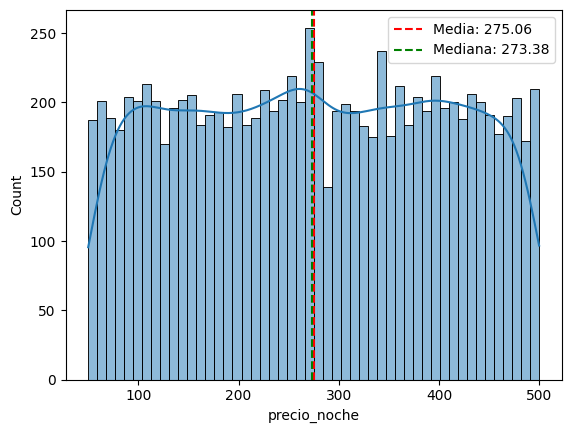

In [63]:
media = np.mean(df_propios["precio_noche"])
mediana = np.median(df_propios["precio_noche"])

sns.histplot(df_propios["precio_noche"], bins=50, kde=True)
plt.axvline(media, color="red", linestyle="dashed", label=(f"Media: {round(media, 2)}"))
plt.axvline(mediana, color="green", linestyle="dashed", label=(f"Mediana: {round(mediana, 2)}"))
plt.legend()
plt.show()

In [64]:
precios = pd.DataFrame(df_propios["precio_noche"].describe()).T
precios

,count,mean,std,min,25%,50%,75%,max
precio_noche,9828.0,275.062794,129.158779,50.01,163.815,273.385,387.2025,499.82


- La media y la mediana son casi iguales, lo que indica que  los precios están distribuidos de manera uniforme (no hay una inclinación fuerte hacia precios muy bajos o muy altos)
- El 50% de los hoteles se encuentran un rango de unos 100€ de diferencia (163€ - 273€).

8. **Visualizar relación entre valoracion y precios.**

Con la media de las valoraciones asignada a todos los hoteles calculamos de nuevo la correlacion:

In [65]:
corr_val_precio = df_propios[["valoracion", "precio_noche"]].corr()
corr_val_precio

,valoracion,precio_noche
valoracion,1.000000,0.001643
precio_noche,0.001643,1.000000


Como habíamos observado, `no hay correlación entre la valoración de los clientesy el precio` (>0.01)

In [66]:
df_propios.groupby("valoracion")["precio_noche"].describe()

,count,mean,std,min,25%,50%,75%,max
valoracion,,,,,,,,
2.91,514.0,271.706353,127.802334,50.19,166.8100,266.835000,379.6900,499.82
2.92,512.0,272.733176,125.098017,53.10,163.8125,269.495000,378.6000,499.75
2.94,1013.0,276.135110,133.224849,50.41,160.7200,272.402335,395.0200,499.63
2.98,1006.0,278.512180,130.835056,51.34,164.5050,278.630000,392.1125,499.70
2.99,510.0,282.492150,129.953280,52.18,176.3725,280.895000,398.6500,499.41
3.00,512.0,277.318824,126.467836,51.22,174.4500,274.560000,381.0675,499.23
3.01,1553.0,271.217807,127.396514,50.03,160.6900,269.680000,379.7500,499.80
3.03,1037.0,279.211413,129.771775,51.83,166.9000,278.300000,394.5900,497.83
3.05,536.0,269.935607,129.509001,50.96,157.0250,267.255000,384.2900,499.67


Observamos que:
- En todos los niveles de valoración hay tanto hoteles muy económicos (min 50€) como hoteles muy caros (máx de 500€)
- Hay un número de hoteles muy similares en cada nivel.

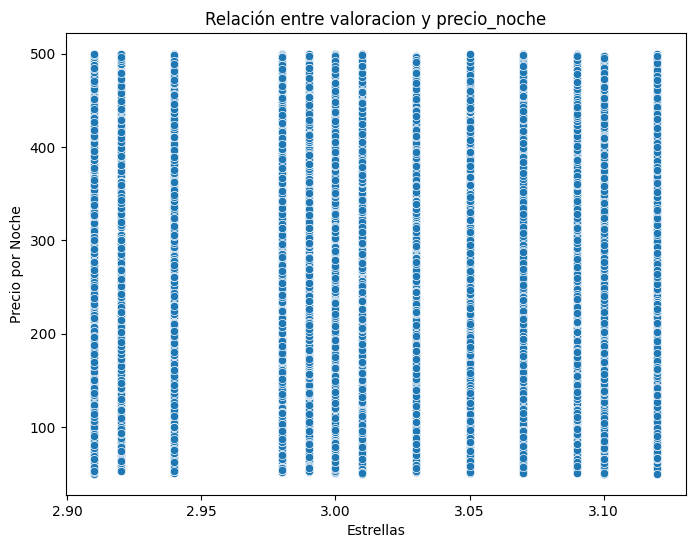

In [67]:
plt.figure(figsize=(8, 6))

sns.scatterplot(data=df_propios, x="valoracion", y="precio_noche")

plt.title("Relación entre valoracion y precio_noche")
plt.xlabel("Estrellas")
plt.ylabel("Precio por Noche")

plt.show()

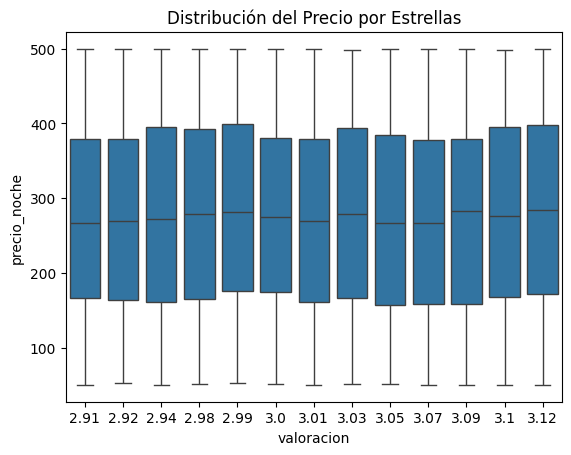

In [68]:
sns.boxplot(data=df_propios, x="valoracion", y="precio_noche")
plt.title("Distribución del Precio por Estrellas")
plt.show()


- Los hoteles en cualquier nivel de valoración tienen abarcan rangos de precio muy similares. No hay diferencias en la experiencia final del cliente en función del precio/noche.
- En cada nivel de valoracion, hay un número de hoteles similares y puede haber tanto hoteles de 50€ como de 500€ (no hay concentración en un tramo concreto --> dispersión de precios)
- Hay una gran variabilidad en los precios pero no se detectan outliers

### GUARDAMOS LOS DATAFRAMES

In [ ]:
df_propios.to_pickle("../data/limpieza_inicial/hoteles_propios.pkl")

In [ ]:
df_competencia.to_pickle("../data/limpieza_inicial/hoteles_competencia.pkl")